<a href="https://colab.research.google.com/github/edquestofficial/Gen-AI-Cohort/blob/main/2024/april/Level_2/1_day/1_chunking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set up the necessary libraries

In [ ]:
!pip install PyPDF2

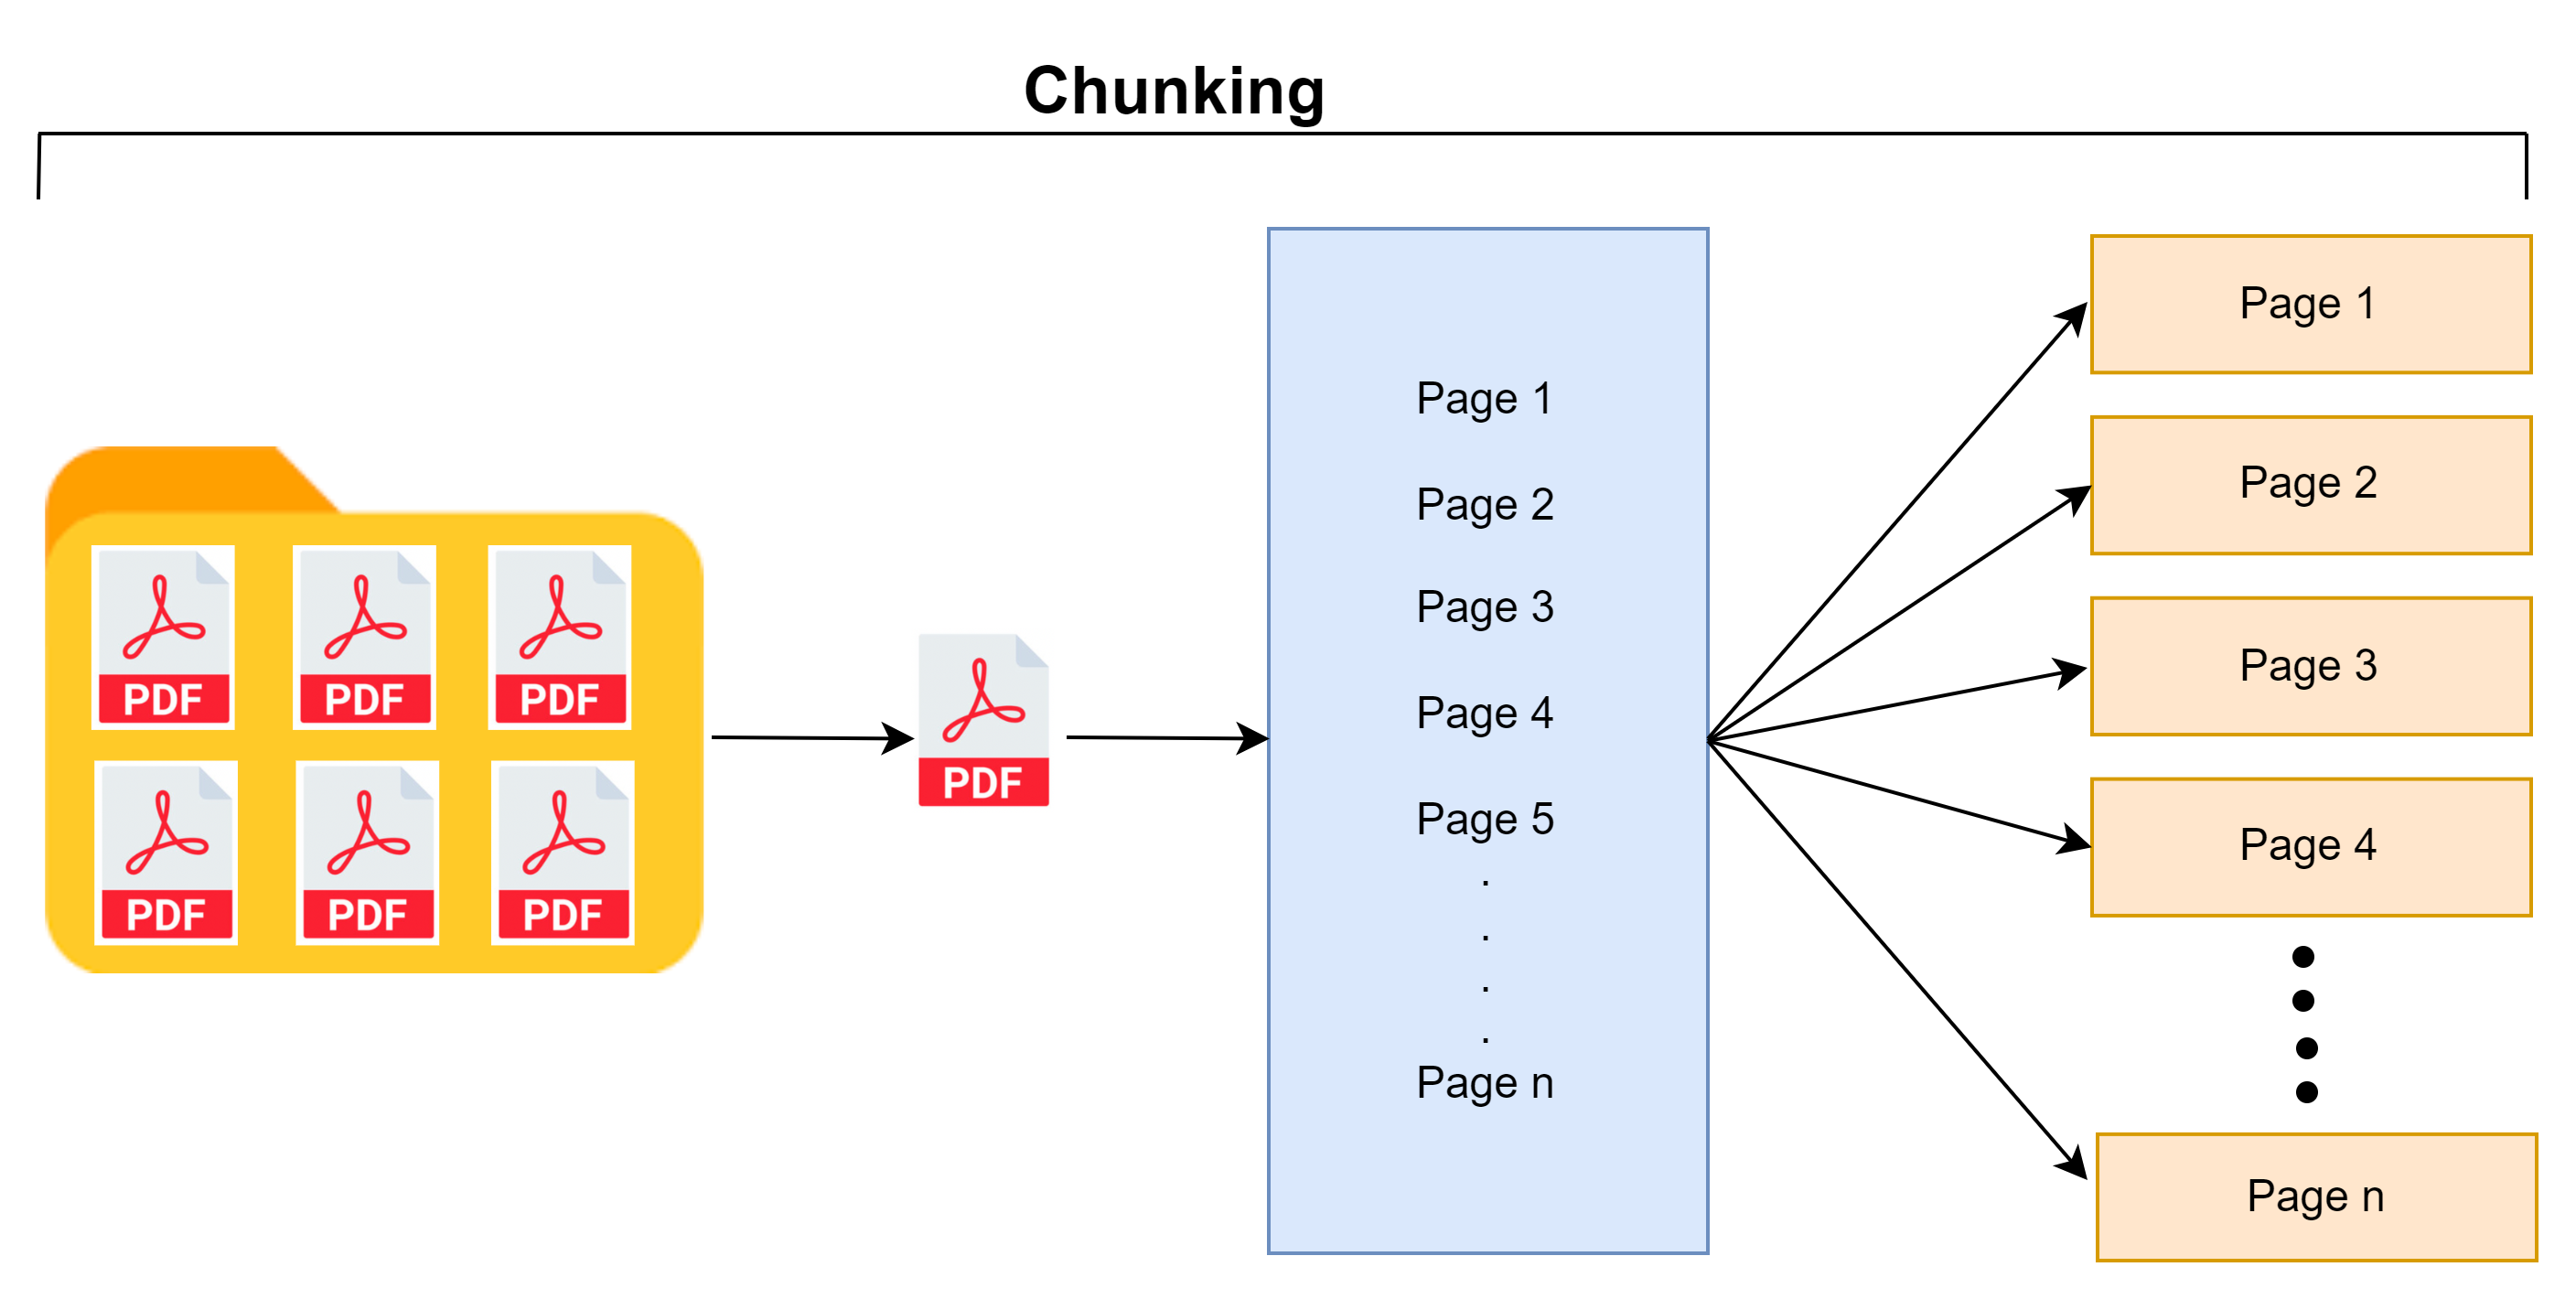

## Import the necessary libraries

In [ ]:
import PyPDF2
import re
import pandas as pd
from google.colab import drive

## Connect Google Drive to access the PDF knowledge base

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Chunking Strategies
  - Fix size chunking
  - Sentense or paragraph based chunking
  - Page-based Chunking

### Fix size chunking

In [ ]:
def fix_size_text_chunker(text, chunk_size):
    """
    Splits text into chunks based on the specified chunk size.

    Args:
        text (str): The input text to be chunked.
        chunk_size (int): The maximum size of each chunk.

    Returns:
        list: A list of text chunks.
    """
    chunks = []  # List to store the text chunks
    words = text.split()  # Split the text into words

    current_chunk = []  # Store words for the current chunk
    current_chunk_length = 0  # Total length of words in the current chunk

    # Iterate through each word in the text
    for word in words:
        # Check if adding the current word to the chunk exceeds the chunk size
        if current_chunk_length + len(word) + 1 <= chunk_size:
            current_chunk.append(word)
            current_chunk_length += len(word) + 1
        else:
            # Add the current chunk to the list of chunks
            chunks.append(' '.join(current_chunk))
            # Start a new chunk with the current word
            current_chunk = [word]
            current_chunk_length = len(word)

    # Append the remaining chunk if it's not empty
    if current_chunk:
        chunks.append(' '.join(current_chunk))

    return chunks

### Sentense or paragraph based chunking

In [ ]:
def sentence_chunker(text, pdf_meta):
    """
    Extracts and chunks sentences from a PDF page.

    Args:
        pdf_page (str): The text extracted from the PDF page.
        pdf_meta (str): Metadata of the PDF.

    Returns:
        data: A dictionary containing page title and chunked text.
    """

    # Split the text into sentences
    # sentence_chunks = extract_sentences_from_text(text)
    sentence_chunks = text.split('\n')  # Split the text into lines to extract sentences

    # Create a dictionary to store the chunks and page title
    data = {'Title': [], 'Chunk Text': []}

    # Add page title and chunked text to the dictionary
    for idx, chunk in enumerate(sentence_chunks):
        data['Title'].append(pdf_meta.author)
        data['Chunk Text'].append(chunk)

    return data

### Page-based Chunking

In [ ]:
def page_chunker(text, pdf_meta):
    """
    Extracts and chunks text from a PDF page.

    Args:
        text: The PDF page extracted text.
        pdf_meta: Metadata of the PDF.

    Returns:
        data: A dictionary containing page title and chunked text.
    """
    # Create a dictionary to store the chunks and page title
    data = {'Title': [], 'Chunk Text': []}

    # Add page title and chunked text to the dictionary
    data['Title'].append(pdf_meta.author)
    data['Chunk Text'].append(text)

    return data

## Apply the specified chunking strategies

In [ ]:
# Open the PDF file
pdf_file = open('/content/drive/MyDrive/Gen Ai/upgrad/data/policy.pdf', 'rb')

# Create lists to store chunked data
fix_all_dfs = []
sentence_all_dfs = []
page_all_dfs = []

# Chunk size for fixed-size text chunking
chunk_size = 300

# Create a PDF reader object
pdf_reader = PyPDF2.PdfReader(pdf_file)

# Number of pages in the PDF
pdf_pages_count = len(pdf_reader.pages)
pdf_meta = pdf_reader.metadata
print(f"Number of pages in pdf {pdf_pages_count}")

# Iterate through each page in the PDF
for page_num in range(pdf_pages_count):
  # Extract the text from the current page
  text = pdf_reader.pages[page_num].extract_text()
  text = re.sub(r'^\s*$\n', '', text, flags=re.MULTILINE)  # Remove blank lines
  text = re.sub(r'\|?\s*\|\s*\|?', '', text)  # Remove table lines
  # page = pdf_reader.pages[page_num]

  # Fix size chunk
  fix_chunk_data = fix_size_text_chunker(text, chunk_size)

  #
  sentence_chunkdata = sentence_chunker(text, pdf_meta)

  #
  page_chunk_data = page_chunker(text, pdf_meta)

  print(f"pange no: {page_num}  && length of df : {len(fix_all_dfs)}")

  # Append chunked data to respective lists
  fix_all_dfs.append(pd.DataFrame(fix_chunk_data))
  sentence_all_dfs.append(pd.DataFrame(sentence_chunkdata))
  page_all_dfs.append(pd.DataFrame(page_chunk_data))

# Concatenate all DataFrames
fix_chunk_df = pd.concat(fix_all_dfs, ignore_index=True)
sentence_chunk_df = pd.concat(sentence_all_dfs, ignore_index=True)
page_chunk_df = pd.concat(page_all_dfs, ignore_index=True)

# Close the PDF file
pdf_file.close()
print(f"fix_chunk_df.shape : {fix_chunk_df.shape}")
print(f"sentence_chunk_df : {sentence_chunk_df.shape}")
print(f"page_chunk_df.shape : {page_chunk_df.shape}")
print("============================================")

In [ ]:
print("============================================")
print(fix_chunk_df.head())

                                                   0
0  Part A <<Date>> <<Policyholder’s Name>> <<Poli...
1  We have made every effort to design your Polic...
2  preserve this document safely and also inform ...
3  conditions stated in the Policy, you have the ...
4  the original Policy (original Policy Document ...


In [ ]:
print("============================================")
print(sentence_chunk_df.head())

  Title                           Chunk Text
0  None                              Part A 
1  None                            <<Date>> 
2  None            <<Policyholder’s Name>>  
3  None          <<Policyholder’s Address>> 
4  None  <<Policyholder’s Contact Number>>  


In [ ]:
print("============================================")
print(page_chunk_df.head())

  Title                                         Chunk Text
0  None               Part A \n<<Date>> \n<<Policyholde...
1  None   Agency/Intermediary Contact Details:  <<Agenc...
2  None   POLICY DOCUMENT- HDFC LIFE EASY HEALTH  \nUni...
3  None   Date of Birth of Appointee << dd/mm/yyyy >>  ...
4  None   Part B \nDefinitions \nThe following capitali...
